In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
data = pd.read_excel('thing.xlsx')
data

In [123]:
Xs = data['x1 x2 x3 x4'.split()]
y = data['y']
m,n = Xs.shape

In [124]:
thetas = np.ones(n)

In [125]:
def h(x):
    return np.dot(thetas, x)

In [126]:
def J(X=Xs, theta=thetas, y=data['y']):
    cost = 0
    for i in range(m):
        hypo = h(np.array(Xs.iloc[i]))
        cost += (hypo - y[i])**2
    return cost/(2*m)

In [143]:
Js = []
thetas = np.ones(n)
num_iters = 1000
alpha = 0.01
for iteration in range(num_iters):
    Js.append(J())
    for j in range(n):
        del_J = 0
        for i in range(m):
            hypo = h(np.array(Xs.iloc[i]))
            del_J += (hypo - y[i])*Xs.iloc[i,j]
        del_J = del_J/m
        thetas[j] -= alpha*del_J
    """epsilon = Js[-1] - J()
    if epsilon<0.001:
        print(iteration, epsilon)
        break"""

In [144]:
J()

5.036127868957982e-17

In [145]:
thetas

array([0.32      , 1.02999999, 0.73      , 0.48      ])

In [146]:
predictions = np.array([h(np.array(Xs.iloc[i])) for i in range(m)])

In [147]:
data['Predict'] = predictions

In [148]:
delta = np.array(data['Predict'] - data['y']) 
np.dot(delta,delta) / (2*m)

5.036127868957982e-17

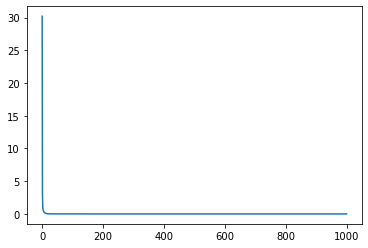

In [149]:
plt.plot(Js)

In [142]:
data

,x1,x2,x3,x4,y,Predict
0,1.4,6.2,4.2,7.4,13.452,13.416218
1,6.2,2.4,8.9,1.1,11.481,11.446064
2,2.3,8.4,9.4,4.6,18.458,18.238758
3,5.2,2.1,7.3,6.3,12.180,12.448088
4,6.2,3.4,4.7,8.5,12.997,13.114192
5,7.4,2.3,1.1,5.7,8.276,8.128300
